In [ ]:
# Run this cell once when starting on notebook.
# On Google Colab, wait for the Google Drive permission prompts before proceeding
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
try:
    %load_ext jupyter_ai_magics
except:
    print("%%ai cells will not work in this notebook")
    print("Please use Gemini for AI queries instead")
from datascience import *
import numpy as np
import math

DATA_FOLDER="data/"
try:
  from google.colab import drive
  drive.mount('/content/drive', force_remount=True)
  !mkdir -p /content/data
  !gdown --folder https://drive.google.com/drive/folders/1XifjqyxFHvjK6nOUi4doYsG12hGPhOcI?usp=drive_link -O /content/data
  DATA_FOLDER = DATA_FOLDER.replace("data/", "/content/data/")
  !ls -l /content/data
except:
  print("Google Drive not mounted; this is normal on Jupyter Hub")


%%ai cells will not work in this notebook
Please use Gemini for AI queries instead
Mounted at /content/drive
Retrieving folder contents
Processing file 1hOMU36QJH-8E1xMqZqick7tdYPtRqXWc codes.csv
Processing file 1-pQmPDnV44eDEVIOm_dglgktbO1ng7pe data_science_salaries_raw.csv
Processing file 1Cl56p5ygZPsG_TdGagMpd2wxMAnsNUN0 ucsb-f25-courses.csv
Processing file 1A6TJBGq7Fg5eO_4XrHgrRRM27RRxB6w7 ucsb-m25-courses.csv
Processing file 1KqFgPgttI11ADhBdGWipQ4RaCyM7S8iZ ucsb-s25-courses.csv
Processing file 1DHBdvECi_-cQtiJ1FZl4v_JfLgAMrauE world_happiness_2015.csv
Processing file 10lU_ehl4CmZqXZ8Ow4tz_G4zHvB9kkwV world_happiness_2019.csv
Processing file 17-CMnZGvqhCNc4_dzlS86njmmPWl_c2g world_university_rankings.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1hOMU36QJH-8E1xMqZqick7tdYPtRqXWc
To: /content/data/codes.csv
100% 6.40k/6.40k [00:00<00:00, 15.4MB/s]
Downloading...
From: 

# Lecture 18, CMPSC 5A, S25

Thu 05/29/2025, Week 9

Google Colab versions of lecture notebooks can be found in this folder:
* <https://drive.google.com/drive/folders/1jS1Fa0BpGUVaijXwIYX0I21Un6XOGQM-?usp=sharing>

Note that the Google Colab version will have any updates made during class, while the copy on Jupyter Hub may not.



## ic29 Participation Assignment

TODO: Create this and link to it on Gradescope

Just one today, on Gradescope as [ic29]()




# Where are we in the reading?

By today, you should have finished reading:

* [Chapter 1: What is Data Science](https://inferentialthinking.com/chapters/01/what-is-data-science.html)
* [Chapter 2 Causality and Experiments](https://inferentialthinking.com/chapters/02/causality-and-experiments.html)
* [Chapter 3: Programming in Python](https://inferentialthinking.com/chapters/03/programming-in-python.html)
* [Chapter 4: Data Types](https://inferentialthinking.com/chapters/04/Data_Types.html)
* [Chapter 5: Sequences](https://inferentialthinking.com/chapters/05/Sequences.html)
* [Chapter 6: Tables](https://inferentialthinking.com/chapters/06/Tables.html)
* [Chapter 7: Visualization](https://inferentialthinking.com/chapters/07/Visualization.html)
* [Chapter 8: Functions and Tables (Intro)](https://inferentialthinking.com/chapters/08/Functions_and_Tables.html)
* [Chapter 9: Randomness](https://inferentialthinking.com/chapters/09/Randomness.html)
* [Chapter 10 (Sampling and Empirical Distributions)](https://inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html)
* [Chapter 11 (Testing Hypotheses, including p-values)](https://inferentialthinking.com/chapters/11/Testing_Hypotheses.html)
* [Chapter 14 (intro, Why the Mean Matters)](https://inferentialthinking.com/chapters/14/Why_the_Mean_Matters.html)
* [Section 14.1, (Properties of the Mean)](https://inferentialthinking.com/chapters/14/1/Properties_of_the_Mean.html)
* [Section 14.2, (Variability)](https://inferentialthinking.com/chapters/14/2/Variability.html)
* [Section 15.1, (Correlation)](https://inferentialthinking.com/chapters/15/1/Correlation.html)



New Reading for Today Thursday (week 9, 05/29):
* [Chapter 12 (Comparing Two Samples, including A/B testing)](https://inferentialthinking.com/chapters/11/Testing_Hypotheses.html)

Unless I update you otherwise, this is all the reading for the quarter.



# Logistics

# A/B Testing

Now you will learn how to decide on whether two numerical samples come from the same underlying distribution!
#### What is A/B testing?

A/B testing is a statistical method used to compare two groups (Group A and Group B) to determine if there is a significant difference between them. It's commonly used in decision-making, such as testing changes in website design, product features, or marketing strategies.

In A/B testing, the goal is to evaluate whether the differences between two groups are due to a real effect (alternative hypothesis) or just random chance (null hypothesis).

#### How Does A/B Testing Work?

1) Formulate hypotheses just like before!

Null Hypothesis - The two groups come from the same underlying distribution and any observed differences are due to random chance.

Alternative Hypothesis - The two groups come from different distributions, meaning there is a real difference between them.

2) Then you collect your data!

Gather numerical data from two groups (e.g., conversion rates, scores, or revenue). In our example below, its going to be means of the groups.

3) Then you compare the groups!

Compute a test statistic (e.g., the difference in means or medians) to summarize the difference between the groups.

4) And simulate under the null hypothesis and visualize the results!

Shuffle or resample the data to simulate what differences might look like if there were no true effect. This generates a null distribution. Plot the null distribution and locate the observed statistic (our red dot!). If the observed statistic is far from the bulk of the null distribution, it's evidence against the null hypothesis.

5) Time to make a decision!

Calculate the p-value - the probability of observing a difference as extreme as (or more extreme than) the observed difference, assuming the null hypothesis is true. Compare the p-value to a significance threshold (e.g., 0.05) to decide whether to reject the null hypothesis. See the section above for more on hypotheses testing, test statistic and p-value!

 You will conduct a new study. You aim to see whether the *research quality score* of all the universities is associated with their *overall score* being higher or lower than the average.

For that, let’s first look at the distribution of the research quality scores of the universities that have overall scores that are higher than the average compared to the universities that have overall scores that are below the average.

In [ ]:
university_rankings = Table().read_table("data/world_university_rankings.csv")
university_rankings

rank,ranking-institution-title,location,Overall scores,Research Quality Score,Industry Score,International Outlook,Research Environment Score,Teaching Score
1,Massachusetts Institute of Technology,United States,94.8,92.2,99.9,89.6,96.5,96
2,Stanford University,United States,93.1,91.9,100,83.5,91.8,98.2
3,University of Oxford,United Kingdom,91.3,81.7,89.4,94.5,97.4,93.5
4,"University of California, Berkeley",United States,90.6,95.2,90.6,83.5,92.7,91.1
5,Peking University,China,90.4,74.5,95.4,94,91.8,96.3
6,Tsinghua University,China,89.6,82.5,99.5,77.7,95.2,93.2
7,University of Cambridge,United Kingdom,89.4,86.6,76.7,95.4,94.6,93.8
8,ETH Zurich,Switzerland,88.3,87.1,99.5,96.4,83.1,75.2
9,Harvard University,United States,87.1,95.2,69.8,82.1,93.4,95
10,National University of Singapore,Singapore,86.8,79.7,97.9,80.4,95.9,79.9


In [ ]:
higher_than_average = university_rankings\
                                  .where('Research Quality Score', are.above(np.average(university_rankings.column('Overall scores'))))
higher_than_average

rank,ranking-institution-title,location,Overall scores,Research Quality Score,Industry Score,International Outlook,Research Environment Score,Teaching Score
1,Massachusetts Institute of Technology,United States,94.8,92.2,99.9,89.6,96.5,96
2,Stanford University,United States,93.1,91.9,100,83.5,91.8,98.2
3,University of Oxford,United Kingdom,91.3,81.7,89.4,94.5,97.4,93.5
4,"University of California, Berkeley",United States,90.6,95.2,90.6,83.5,92.7,91.1
5,Peking University,China,90.4,74.5,95.4,94,91.8,96.3
6,Tsinghua University,China,89.6,82.5,99.5,77.7,95.2,93.2
7,University of Cambridge,United Kingdom,89.4,86.6,76.7,95.4,94.6,93.8
8,ETH Zurich,Switzerland,88.3,87.1,99.5,96.4,83.1,75.2
9,Harvard University,United States,87.1,95.2,69.8,82.1,93.4,95
10,National University of Singapore,Singapore,86.8,79.7,97.9,80.4,95.9,79.9


In [ ]:
average_score = np.average(university_rankings.column('Overall scores'))

# Filtering universities with scores higher than the average
higher_than_average = university_rankings\
                          .where('Overall scores', are.above(average_score))

# Counting the number of universities that meet the condition
num_higher_than_average = higher_than_average.num_rows

# Counting the number of non-American universities that don't meet the condition
num_lower_than_average = university_rankings.num_rows - num_higher_than_average

# Creating a new table to display the results
result_table = Table().with_columns([
    'Condition', ['Higher than Average', 'Lower than Average'],
    'Count', [num_higher_than_average, num_lower_than_average]
])
result_table

Condition,Count
Higher than Average,429
Lower than Average,481


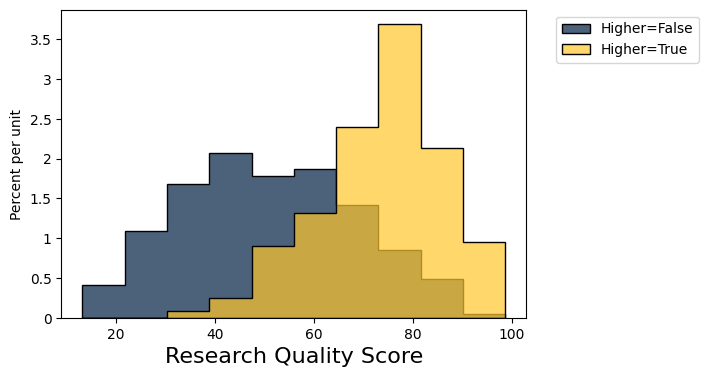

In [ ]:
%matplotlib inline

# Create a label between A and B group for our A/B test
def check_average(val):
    if val>np.average(university_rankings.column('Overall scores')):
        return True
    else:
        return False

# apply function to create label column
university_subset = university_rankings\
.with_column("Higher",university_rankings.apply(check_average,"Overall scores"))


university_subset.group("Higher")
university_subset.hist('Research Quality Score', group = 'Higher')

You can observe that even though there is some distance between the averages of the two distributions, there is a significant amount of overlap happening between the histograms. This raises the question of whether the difference reflects just chance or a difference in the distributions in the larger population of universities.

Alright. It's time for another test hypothesis! Let's repeat the problem statement -
#### What do we want to know?
We want to know if universities with overall scores above average tend to have higher research quality scores than those with below-average scores. This is the alternative hypothesis. The null hypothesis states there is no relationship between these scores.

Again, define your *null* and *alternative* hypotheses. As a *null* hypothesis you can assume that the two distributions are identical but the differences that we observed on the graph above are attributed to chance. As an *alternative* hypothesis you can assume that among all the universities, the ones that have an overall score above the average, have a higher research quality score while the ones that have an overall score below the average, have a lower research quality score.

What's next? Of course, you need to define your test statistic. It would be reasonable for you to use the difference between the two group means as your statistic, right? Yes and that is because the alternative hypothesis compares the averages of the research quality score for the two groups of universities.

In [ ]:
ave1=np.average(university_rankings.where('Overall scores', are.above(average_score)).column('Research Quality Score'))
ave2=np.average(university_rankings.where('Overall scores', are.below(average_score)).column('Research Quality Score'))
result_table = result_table.with_columns([
    'Average', [ave1, ave2]
])
result_table

Condition,Count,Average
Higher than Average,429,73.6242
Lower than Average,481,50.9807


In [ ]:
means = result_table.column(2)
observed_difference = means.item(1) - means.item(0)
observed_difference

-22.643577143577147

#### Time to simulate!
To test the null hypothesis, we will simulate (say, 5000 - this can be 10000 or 20000 or a big enough number you choose) random differences in group means. These values represent what we'd expect if there were no real relationship between overall score and research quality score. This is called the null distribution.

How do we do that? We don't have any probability arrays here! Thankfully enough we have tests that are based on random permutations of the data and are called *permutation tests*. Permutation tests allow us to "shuffle" or "permute" the data labels (a column of interest) to generate a distribution of differences that would occur under the null hypothesis. In other words, we are going to randomly re-assign values in a column!

The random permutation test is a statistical method used to assess the significance of an observed result by comparing it to a distribution of randomly permuted data. Here is how it works:

1. Start with a dataset containing your observed measurements or values.

2. Identify the specific statistic or measure that you want to test. It could be a mean, median, correlation coefficient, or any other relevant measure.

3. Randomly shuffle (permute) the values of your dataset, while keeping the associations between variables intact. For example, if you have two variables X and Y, make sure that the X and Y values remain paired in the permuted dataset.

4. Calculate the statistic of interest (e.g., mean, median) using the permuted dataset.

5. Repeat steps 3 and 4 a large number of times (e.g., 1000) to create a distribution of statistics generated from randomly permuted data.

6. Compare the observed statistic (from step 2) with the distribution of permuted statistics. Determine the proportion of permuted statistics that are more extreme than the observed statistic.

7. This proportion represents the p-value, which tells you the likelihood of obtaining a statistic as extreme as the observed one by chance alone. A smaller p-value indicates stronger evidence against the null hypothesis (i.e., that there is no significant effect or relationship).

By using random permutations, the test allows you to generate a null distribution under the assumption of no effect, enabling you to assess the significance of your observed result in a robust and unbiased manner.

An implementation will help.

First you are going to need a function that computes the difference between the means.

In [ ]:
def difference_of_means(table, group_label):

    # Prune the table to reduce computational load
    reduced = table.select('Research Quality Score', group_label)

    # group based off Group A or Group B that have been randomly selected
    means_table = reduced.group(group_label, np.average)

    # Compute difference in mean Research Quality Score between group A and B
    means = means_table.column(1)
    return means.item(1) - means.item(0)

In [ ]:
university_reduced = university_rankings.with_column("Higher",university_rankings.apply(check_average,"Overall scores")).select("ranking-institution-title",'Higher','Research Quality Score')
university_reduced

ranking-institution-title,Higher,Research Quality Score
Massachusetts Institute of Technology,True,92.2
Stanford University,True,91.9
University of Oxford,True,81.7
"University of California, Berkeley",True,95.2
Peking University,True,74.5
Tsinghua University,True,82.5
University of Cambridge,True,86.6
ETH Zurich,True,87.1
Harvard University,True,95.2
National University of Singapore,True,79.7


In [ ]:
shuffled_labels = university_reduced.sample(with_replacement = False).column(1)
original_and_shuffled = university_reduced.with_column('Shuffled Label', shuffled_labels)
original_and_shuffled

ranking-institution-title,Higher,Research Quality Score,Shuffled Label
Massachusetts Institute of Technology,True,92.2,True
Stanford University,True,91.9,True
University of Oxford,True,81.7,False
"University of California, Berkeley",True,95.2,True
Peking University,True,74.5,False
Tsinghua University,True,82.5,False
University of Cambridge,True,86.6,True
ETH Zurich,True,87.1,False
Harvard University,True,95.2,True
National University of Singapore,True,79.7,False


Now you need to calcualte the distance between the averages of the suffled groups. So let's put your `difference_of_means` function into use. Eventually, you will need to compare that with the original groups.

In [ ]:
shuffled_only = original_and_shuffled.select('Research Quality Score','Shuffled Label')
shuffled_group_means = shuffled_only.group('Shuffled Label', np.average)
shuffled_group_means
difference_of_means(original_and_shuffled, 'Shuffled Label')

0.8383103383103432

Now for your convenience let's put everything under a single function!

In [ ]:
def one_simulated_difference_of_means():
    # array of shuffled labels
    shuffled_labels = university_reduced.sample(with_replacement=False).column('Higher')

    # table of original and shuffled labels
    shuffled_table = university_reduced.select('Research Quality Score').with_column(
        'Shuffled Label', shuffled_labels)

    return difference_of_means(shuffled_table, 'Shuffled Label')

one_simulated_difference_of_means()

0.13138663138662565

It is now time to run some permutation test! For that you will need a `for` loop to be able to execute the function you built above multiple times.

In [ ]:
differences = make_array()

repetitions = 10000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference_of_means()
    differences = np.append(differences, new_difference)

Finally, to draw any meaningfull conclusions, you will need to plot the histogram that shows the distribution of these 5,000 values. By now you should know how.

Make sure you don't forget to plot the observed statistic as well!

Observed Difference: -22.643577143577147


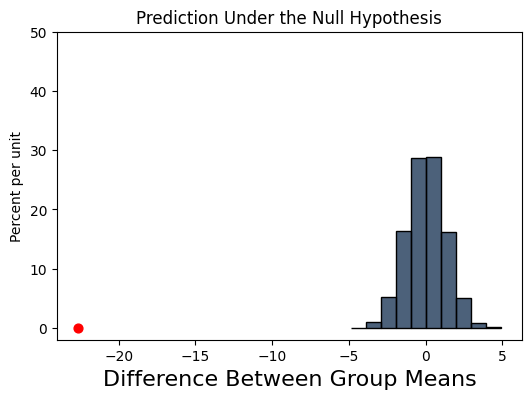

In [ ]:
Table().with_column('Difference Between Group Means', differences).hist()
print('Observed Difference:', observed_difference)
plt.title('Prediction Under the Null Hypothesis');
plt.ylim(-0.02, 0.5)
plt.scatter(observed_difference, 0, color='red', s=40);

You could calculate the p-value but let's be honest, the observed difference is so far from the mean that we could safely conclude to the fact that based on the test results data favor the alternative over the null hypothesis (you can assume that among all the universities, the ones that have an overall score above the average, have a higher research quality score while the ones that have an overall score below the average, have a lower research quality score).